In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [216]:
boston = pd.read_csv("boston_house_prices.csv", header=0)
boston.columns = boston.iloc[0]
boston = boston[1:]


In [217]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [218]:
dataset = pd.DataFrame(boston)
dataset = dataset.rename(columns = {"MEDV": "Price"})

In [219]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [220]:
dataset.isna().any()

0
CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

In [221]:
# import seaborn as sns
# matrix = dataset.corr()
# sns.pairplot(matrix)

In [222]:
X = dataset.drop(columns = 'Price')
Y = dataset['Price']
# print(X.shape())

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state = 43)

In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_test = pd.to_numeric(Y_test)

In [225]:
# from sklearn.linear_model import LinearRegression
# linreg = LinearRegression()

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_train, Y_train)

ElasticNet(alpha=0.5)

In [226]:
elastic_net.fit(X_train, Y_train)

ElasticNet(alpha=0.5)

In [227]:
Y_pred = elastic_net.predict(X_test)
# Y_pred

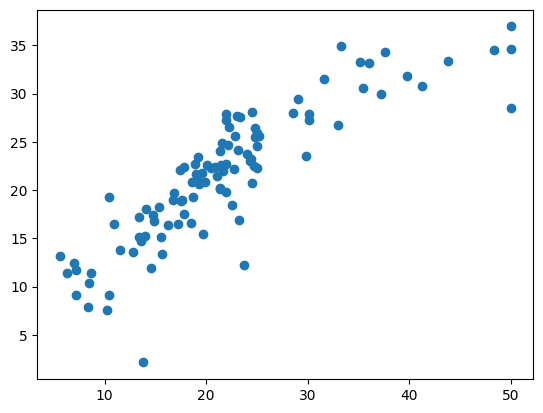

In [228]:
plt.scatter(Y_test, Y_pred )
# plt.plot(Y_test, Y_pred, color="red")

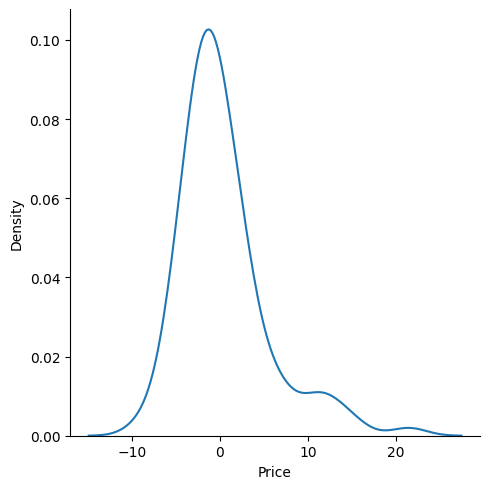

In [229]:
import seaborn as sns
residuals = Y_test-Y_pred
sns.displot(residuals, kind = "kde")

In [230]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.7282109612008187

In [234]:
data_point = boston.iloc[0].drop(boston.columns[-1]).values.reshape(1, -1)
scaled_data_point = scaler.transform(data_point)


c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [236]:
elastic_net.predict(scaled_data_point)

array([29.70913509])

In [239]:
import pickle
pickle.dump(elastic_net, open('regmodel.pkl', 'wb'))

In [241]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))
pickled_model.predict(scaled_data_point)

array([29.70913509])